In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


import warnings
warnings.filterwarnings('ignore')


plt.style.use("fivethirtyeight")
%matplotlib inline

pd.set_option('display.max_columns', 30)

In [2]:
df=pd.read_csv("kidney_disease.csv")

In [3]:
df

id   age    bp     sg   al   su     rbc        pc         pcc   
0      0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  \
1      1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent   
2      2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
..   ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba  ...  pcv    wc   rc  htn   dm  cad appet   pe  ane   
0    notpresent  ...   44  7800  5.2  yes  yes   no  good   no   no  \
1    notpresent  ...   38  6000  NaN   no   no   no  good   no   no   
2    notpresent  ...   31  7500  NaN   no  yes   no  poor   no  yes   
3    notpresent  ...   32  6700  3.9  yes   no   no  poor  yes  yes   
4    notpresent  ...   35  7300  4.6   no   no   no  good   no   no   
..          ...  ...  ...   ...  ...  ...  ...  ...   ...  ...  ...   
395  notpresent  ...   47  6700  4.9   no   no   no  good   no   no   
396  notpresent  ...   54  7800  6.2   no   no   no  good   no   no   
397  notpresent  ...   49  6600  5.4   no   no   no  good   no   no   
398  notpresent  ...   51  7200  5.9   no   no   no  good   no   no   
399  notpresent  ...   53  6800  6.1   no   no   no  good   no   no   

    classification  
0              ckd  
1              ckd  
2              ckd  
3              ckd  
4              ckd  
..             ...  
395         notckd  
396         notckd  
397         notckd  
398         notckd  
399         notckd  

[400 rows x 26 columns]

In [4]:
df.head()

id   age    bp     sg   al   su     rbc        pc         pcc          ba   
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent  \
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]

In [5]:
df.tail()

id   age    bp     sg   al   su     rbc      pc         pcc          ba   
395  395  55.0  80.0  1.020  0.0  0.0  normal  normal  notpresent  notpresent  \
396  396  42.0  70.0  1.025  0.0  0.0  normal  normal  notpresent  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal  normal  notpresent  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal  normal  notpresent  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal  normal  notpresent  notpresent   

     ...  pcv    wc   rc  htn  dm  cad appet  pe ane classification  
395  ...   47  6700  4.9   no  no   no  good  no  no         notckd  
396  ...   54  7800  6.2   no  no   no  good  no  no         notckd  
397  ...   49  6600  5.4   no  no   no  good  no  no         notckd  
398  ...   51  7200  5.9   no  no   no  good  no  no         notckd  
399  ...   53  6800  6.1   no  no   no  good  no  no         notckd  

[5 rows x 26 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [7]:
df.describe()

id         age          bp          sg          al          su   
count  400.000000  391.000000  388.000000  353.000000  354.000000  351.000000  \
mean   199.500000   51.483376   76.469072    1.017408    1.016949    0.450142   
std    115.614301   17.169714   13.683637    0.005717    1.352679    1.099191   
min      0.000000    2.000000   50.000000    1.005000    0.000000    0.000000   
25%     99.750000   42.000000   70.000000    1.010000    0.000000    0.000000   
50%    199.500000   55.000000   80.000000    1.020000    0.000000    0.000000   
75%    299.250000   64.500000   80.000000    1.020000    2.000000    0.000000   
max    399.000000   90.000000  180.000000    1.025000    5.000000    5.000000   

              bgr          bu          sc         sod         pot        hemo  
count  356.000000  381.000000  383.000000  313.000000  312.000000  348.000000  
mean   148.036517   57.425722    3.072454  137.528754    4.627244   12.526437  
std     79.281714   50.503006    5.741126   10.408752    3.193904    2.912587  
min     22.000000    1.500000    0.400000    4.500000    2.500000    3.100000  
25%     99.000000   27.000000    0.900000  135.000000    3.800000   10.300000  
50%    121.000000   42.000000    1.300000  138.000000    4.400000   12.650000  
75%    163.000000   66.000000    2.800000  142.000000    4.900000   15.000000  
max    490.000000  391.000000   76.000000  163.000000   47.000000   17.800000

In [9]:
df.drop('id', axis = 1, inplace=True)

In [10]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [11]:
df

age  blood_pressure  specific_gravity  albumin  sugar red_blood_cells   
0    48.0            80.0             1.020      1.0    0.0             NaN  \
1     7.0            50.0             1.020      4.0    0.0             NaN   
2    62.0            80.0             1.010      2.0    3.0          normal   
3    48.0            70.0             1.005      4.0    0.0          normal   
4    51.0            80.0             1.010      2.0    0.0          normal   
..    ...             ...               ...      ...    ...             ...   
395  55.0            80.0             1.020      0.0    0.0          normal   
396  42.0            70.0             1.025      0.0    0.0          normal   
397  12.0            80.0             1.020      0.0    0.0          normal   
398  17.0            60.0             1.025      0.0    0.0          normal   
399  58.0            80.0             1.025      0.0    0.0          normal   

     pus_cell pus_cell_clumps    bacteria  blood_glucose_random  blood_urea   
0      normal      notpresent  notpresent                 121.0        36.0  \
1      normal      notpresent  notpresent                   NaN        18.0   
2      normal      notpresent  notpresent                 423.0        53.0   
3    abnormal         present  notpresent                 117.0        56.0   
4      normal      notpresent  notpresent                 106.0        26.0   
..        ...             ...         ...                   ...         ...   
395    normal      notpresent  notpresent                 140.0        49.0   
396    normal      notpresent  notpresent                  75.0        31.0   
397    normal      notpresent  notpresent                 100.0        26.0   
398    normal      notpresent  notpresent                 114.0        50.0   
399    normal      notpresent  notpresent                 131.0        18.0   

     serum_creatinine  sodium  potassium  haemoglobin packed_cell_volume   
0                 1.2     NaN        NaN         15.4                 44  \
1                 0.8     NaN        NaN         11.3                 38   
2                 1.8     NaN        NaN          9.6                 31   
3                 3.8   111.0        2.5         11.2                 32   
4                 1.4     NaN        NaN         11.6                 35   
..                ...     ...        ...          ...                ...   
395               0.5   150.0        4.9         15.7                 47   
396               1.2   141.0        3.5         16.5                 54   
397               0.6   137.0        4.4         15.8                 49   
398               1.0   135.0        4.9         14.2                 51   
399               1.1   141.0        3.5         15.8                 53   

    white_blood_cell_count red_blood_cell_count hypertension   
0                     7800                  5.2          yes  \
1                     6000                  NaN           no   
2                     7500                  NaN           no   
3                     6700                  3.9          yes   
4                     7300                  4.6           no   
..                     ...                  ...          ...   
395                   6700                  4.9           no   
396                   7800                  6.2           no   
397                   6600                  5.4           no   
398                   7200                  5.9           no   
399                   6800                  6.1           no   

    diabetes_mellitus coronary_artery_disease appetite peda_edema aanemia   
0                 yes                      no     good         no      no  \
1                  no                      no     good         no      no   
2                 yes                      no     poor         no     yes   
3                  no                      no     poor        yes     yes   
4                  no                    

In [12]:
df.shape

(400, 25)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [16]:
df['packed_cell_volume']

0      44
1      38
2      31
3      32
4      35
       ..
395    47
396    54
397    49
398    51
399    53
Name: packed_cell_volume, Length: 400, dtype: object

In [21]:
df['packed_cell_volume']=df['packed_cell_volume'] = pd.to_numeric(df.packed_cell_volume, errors = 'coerce')
#errors='coerce' ignore null value it will not throw errors

In [23]:
df['packed_cell_volume'].dtypes

dtype('float64')

In [24]:
df['white_blood_cell_count']

0      7800
1      6000
2      7500
3      6700
4      7300
       ... 
395    6700
396    7800
397    6600
398    7200
399    6800
Name: white_blood_cell_count, Length: 400, dtype: object

In [25]:
df['white_blood_cell_count']=pd.to_numeric(df.white_blood_cell_count,errors='coerce')

In [26]:
df['white_blood_cell_count']

0      7800.0
1      6000.0
2      7500.0
3      6700.0
4      7300.0
        ...  
395    6700.0
396    7800.0
397    6600.0
398    7200.0
399    6800.0
Name: white_blood_cell_count, Length: 400, dtype: float64

In [29]:
df['red_blood_cell_count']=pd.to_numeric(df.white_blood_cell_count,errors='coerce')

In [28]:
df['red_blood_cell_count']

0      7800.0
1      6000.0
2      7500.0
3      6700.0
4      7300.0
        ...  
395    6700.0
396    7800.0
397    6600.0
398    7200.0
399    6800.0
Name: red_blood_cell_count, Length: 400, dtype: float64

In [30]:
cat_cols=[col for col in df.columns if df[col].dtype=='object']
cat_cols

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

In [31]:
num_cols=[col for col in df.columns if df[col].dtype!='object']
num_cols

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [45]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values \n")

red_blood_cells has [nan 'normal' 'abnormal'] values 

pus_cell has ['normal' 'abnormal' nan] values 

pus_cell_clumps has ['notpresent' 'present' nan] values 

bacteria has ['notpresent' 'present' nan] values 

hypertension has ['yes' 'no' nan] values 

diabetes_mellitus has ['yes' 'no' nan] values 

coronary_artery_disease has ['no' 'yes' nan] values 

appetite has ['good' 'poor' nan] values 

peda_edema has ['no' 'yes' nan] values 

aanemia has ['no' 'yes' nan] values 

class has ['ckd' 'not ckd'] values 



In [35]:
#for multiple replaces
df['diabetes_mellitus'].replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

In [38]:
df['coronary_artery_disease'].replace(to_replace={'\tno' : 'no'},inplace=True)

In [44]:
df['class'].replace(to_replace={'notckd':'not ckd'},inplace=True)

In [48]:
df['class'].unique()

array([0, 1], dtype=int64)

In [47]:
df['class']=df['class'].map({'ckd':0,'not ckd':1})

In [50]:
df['age'].isna().sum()

9

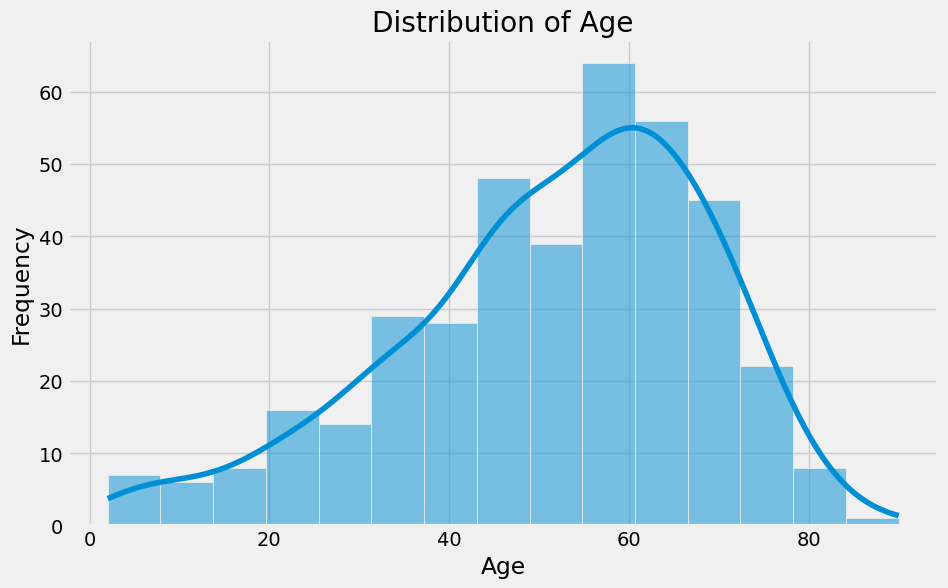

In [51]:
#ubivariate analysis
plt.figure(figsize=(10,6))
#kde to show distribution
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
sns.histplot(df['age'].dropna(),kde=True)
plt.show()

#insight
'''
most of the people are around 40-60 range

'''

In [52]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

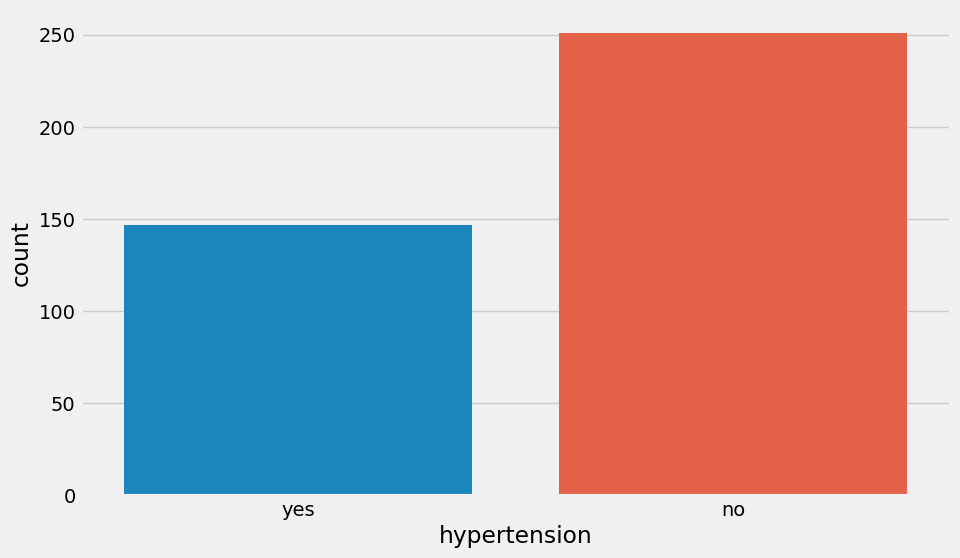

In [54]:
#How many people having chronic disease have hypertension
plt.figure(figsize=(10,6))
plt.xlabel("hypertension")
plt.ylabel("Count")
sns.countplot(x=df['hypertension'].dropna())
plt.show()

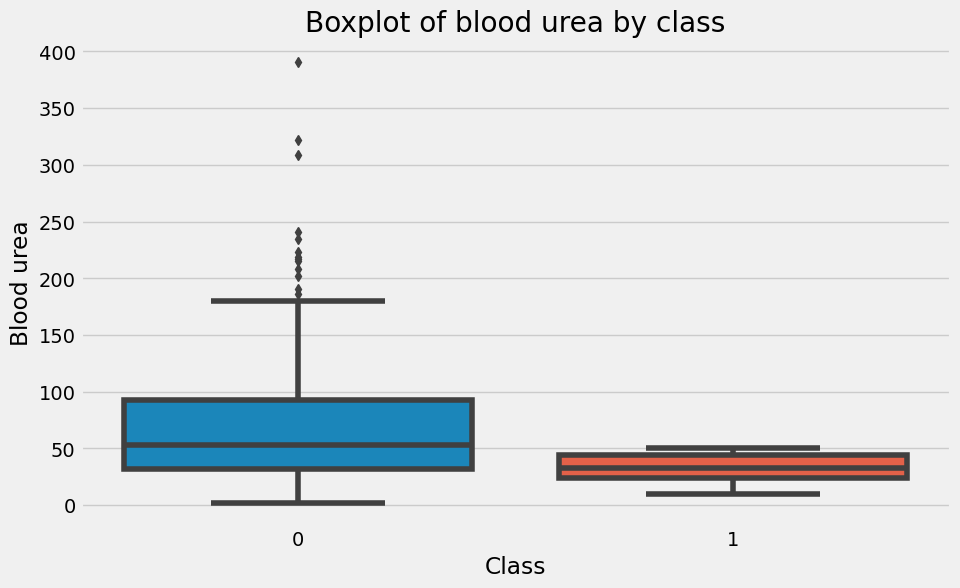

In [55]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'class', y='blood_urea', data=df)
plt.xlabel('Class')
plt.ylabel('Blood urea')
plt.title("Boxplot of blood urea by class")
plt.show()

In [56]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

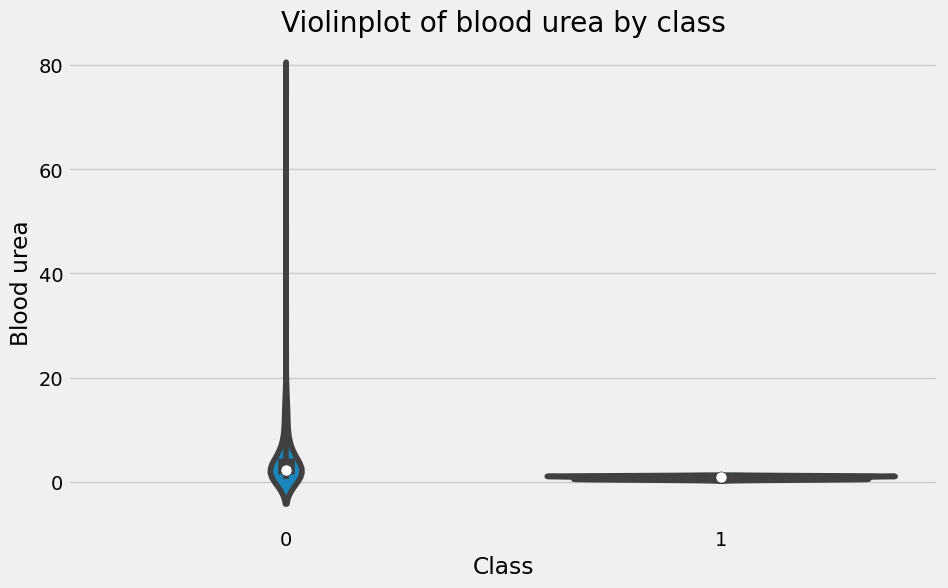

In [57]:
plt.figure(figsize = (10, 6))
sns.violinplot(x = 'class', y='serum_creatinine', data=df)
plt.xlabel('Class')
plt.ylabel('Blood urea')
plt.title("Violinplot of blood urea by class")
plt.show()

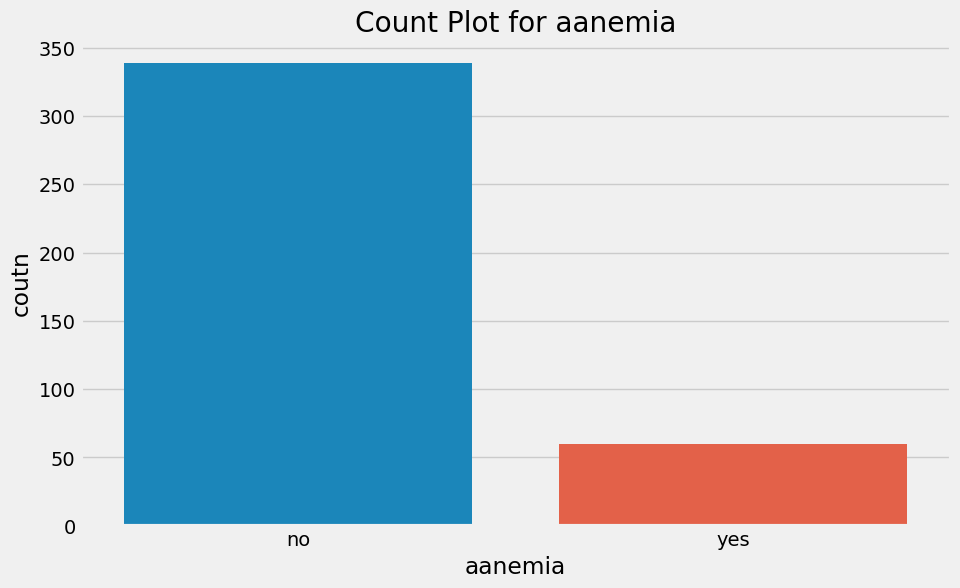

In [59]:
plt.figure(figsize = (10, 6))
sns.countplot(x = 'aanemia',data=df)
plt.xlabel('aanemia')
plt.ylabel('coutn')
plt.title("Count Plot for aanemia")
plt.show()

<Axes: ylabel='count'>

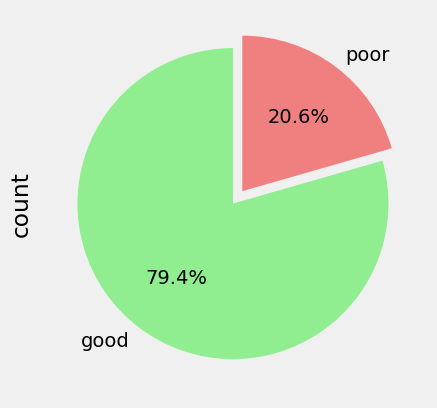

In [67]:
df['appetite'].value_counts().plot.pie(explode=(0,0.1), colors=['lightgreen','lightcoral'],autopct="%1.1f%%",startangle=90)

<Axes: xlabel='peda_edema', ylabel='count'>

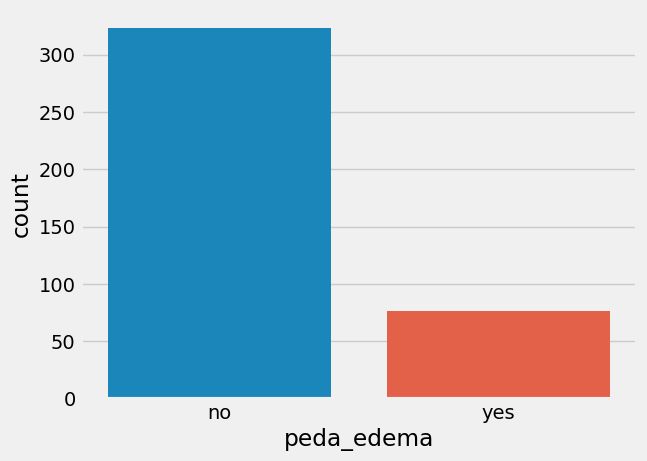

In [68]:
sns.countplot(x = 'peda_edema', data=df)

<Axes: ylabel='count'>

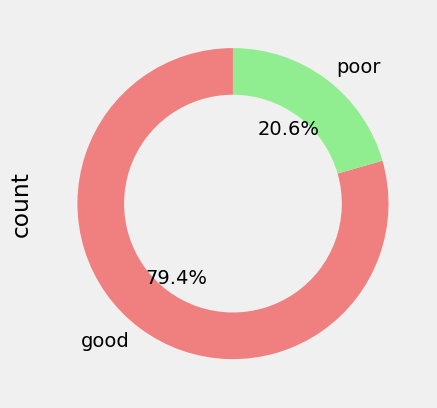

In [70]:
#79.4% has good appetite

df['appetite'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'], wedgeprops = dict(width=0.3), startangle = 90)

In [71]:
#if we want to analyse - how many ppl having cronic disease and hypertension with poor appetite?

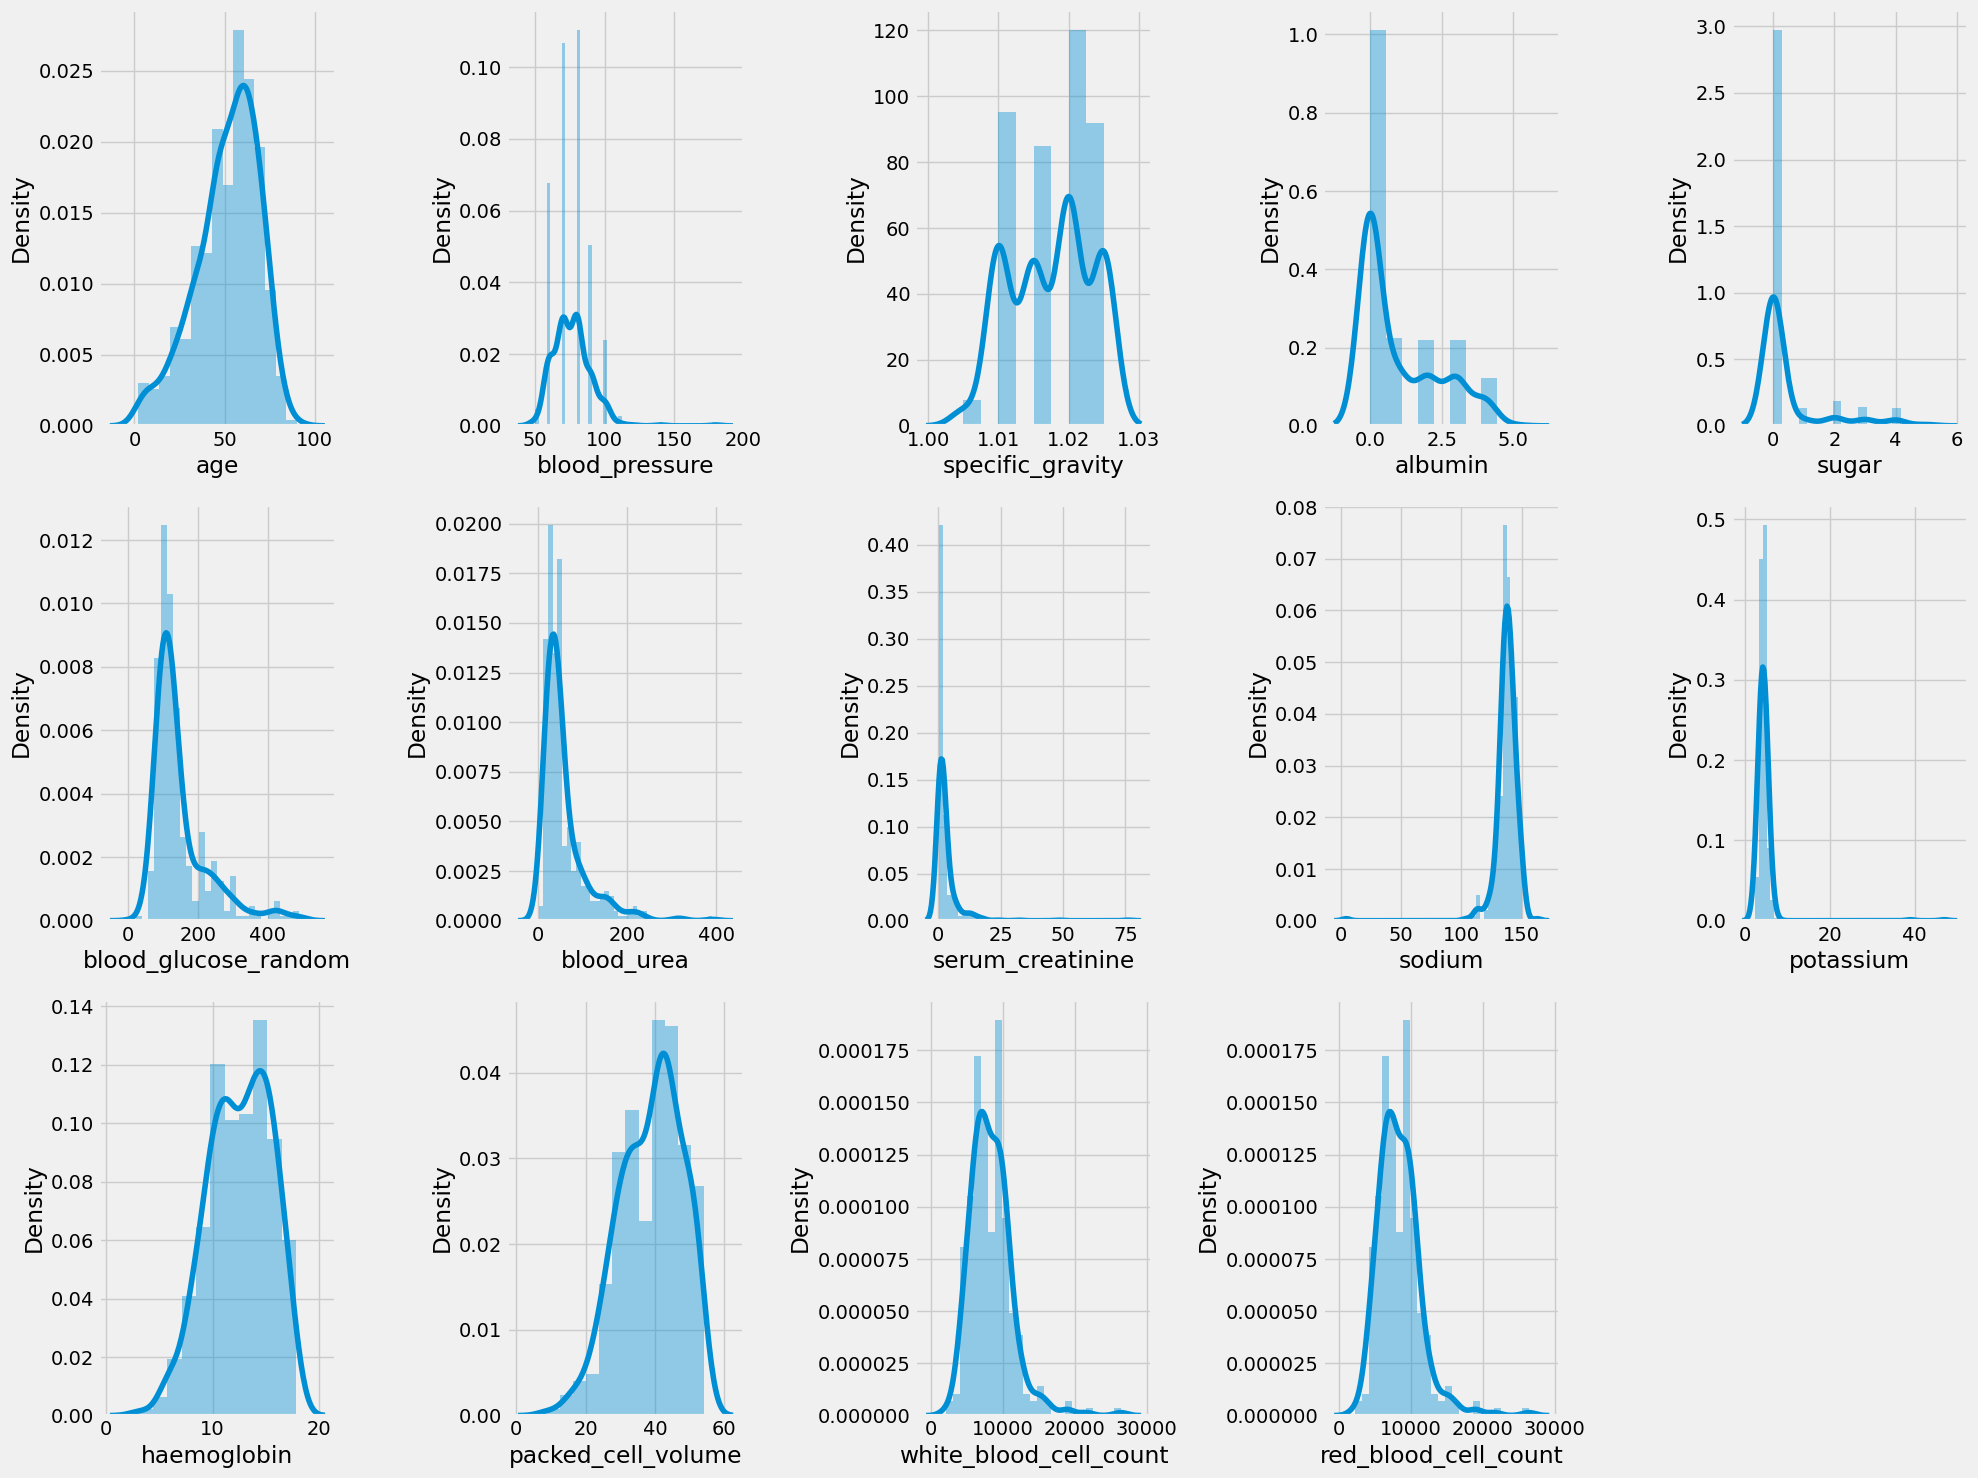

In [87]:
plt.figure(figsize = (20, 15))
plotnumber = 1


for col in num_cols:
    if plotnumber <= 15:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col)
    plotnumber += 1
    
plt.tight_layout()
plt.show()

In [73]:
def kde(col):
    grid = sns.FacetGrid(df, hue = "class", height =6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()

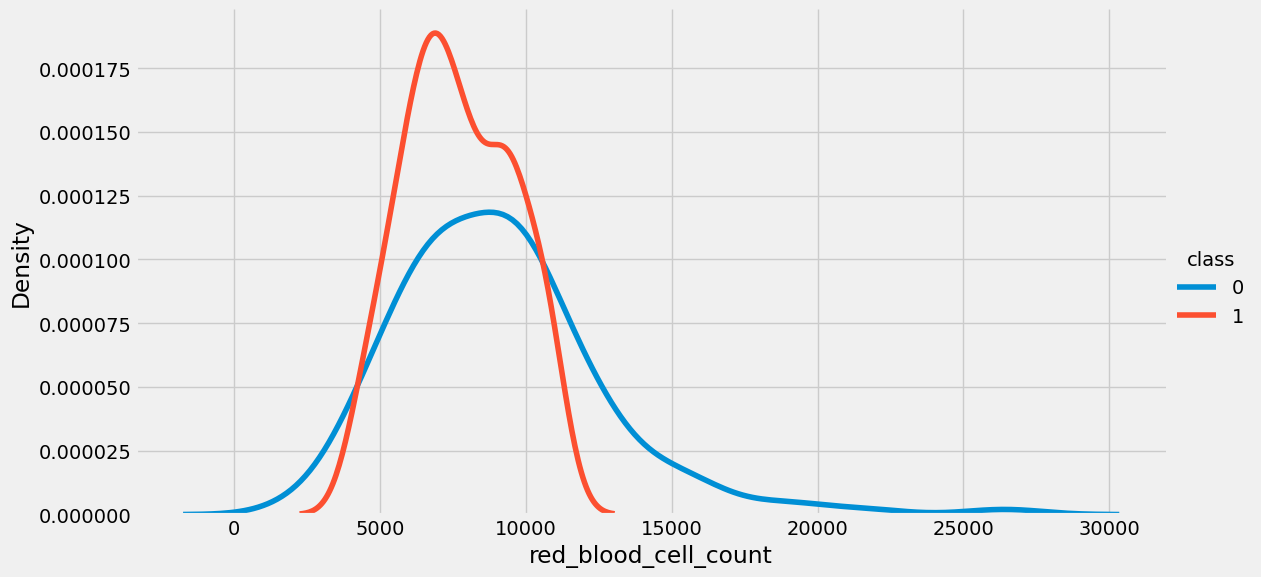

In [74]:
kde('red_blood_cell_count')

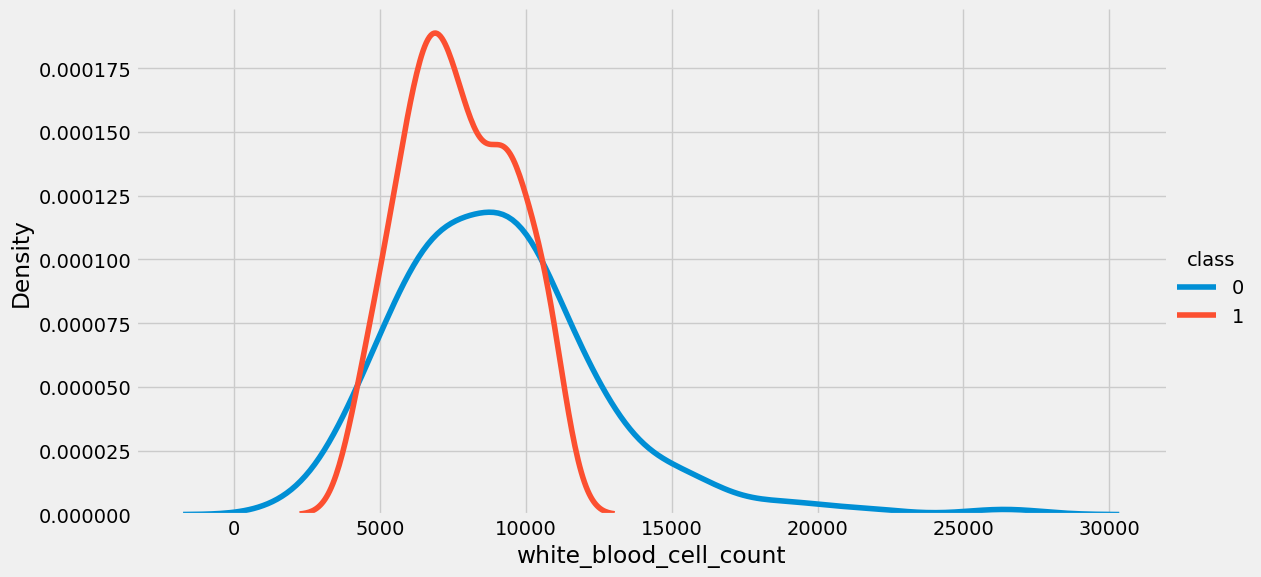

In [75]:
kde('white_blood_cell_count')

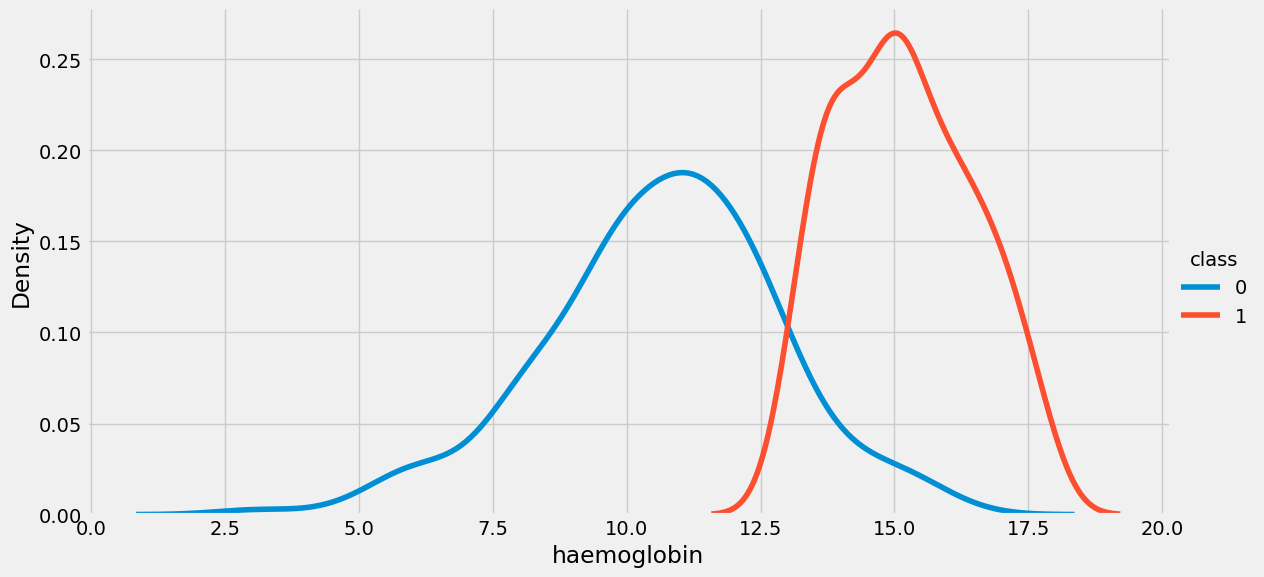

In [76]:
kde('haemoglobin')

In [78]:
df['class'].unique()

array([0, 1], dtype=int64)

<Axes: xlabel='age', ylabel='blood_pressure'>

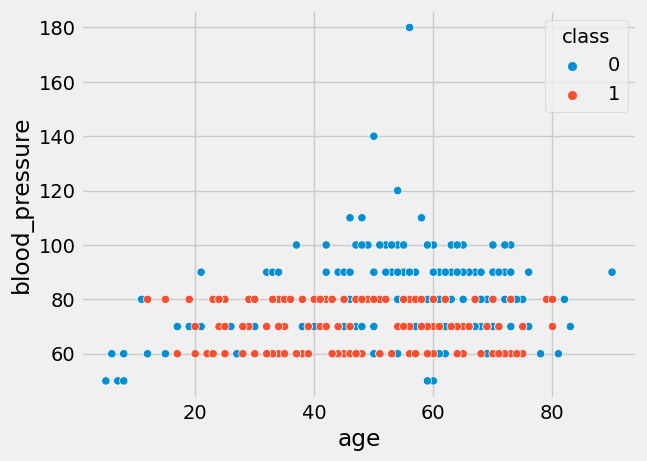

In [83]:
#bivariate
sns.scatterplot(x='age',y='blood_pressure',data=df,hue='class')
#insights>>high bp causes chronic disease

In [84]:
diabetes_hypertension = pd.crosstab(df['diabetes_mellitus'], df['hypertension'])
diabetes_hypertension

hypertension        no  yes
diabetes_mellitus          
no                 220   41
yes                 31  106

In [88]:
def violin(col):
    fig = px.violin(df, y=col, x='class', box =True, template = 'plotly_dark')
    return fig.show()

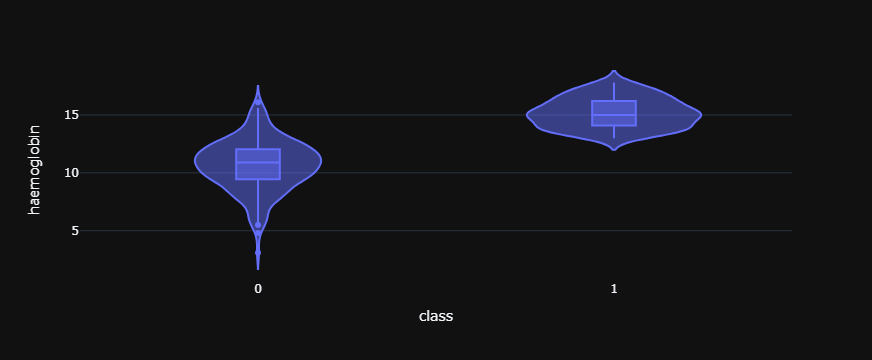

In [89]:
violin('haemoglobin')

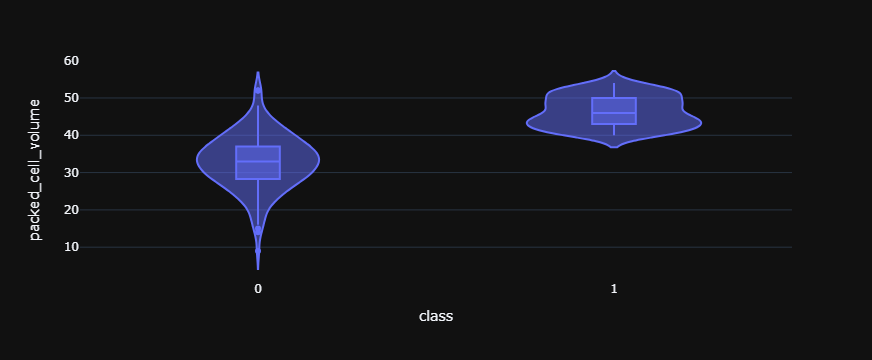

In [90]:
#insights >> outliers are present, 3.1 and 4.8, 16.1 for class 0

violin('packed_cell_volume')

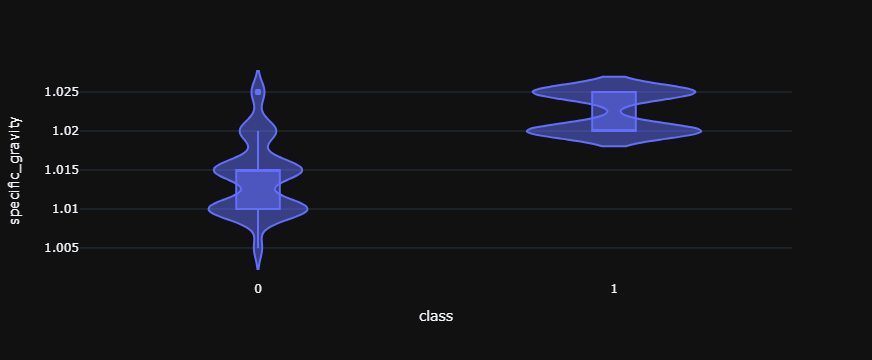

In [91]:
violin('specific_gravity')

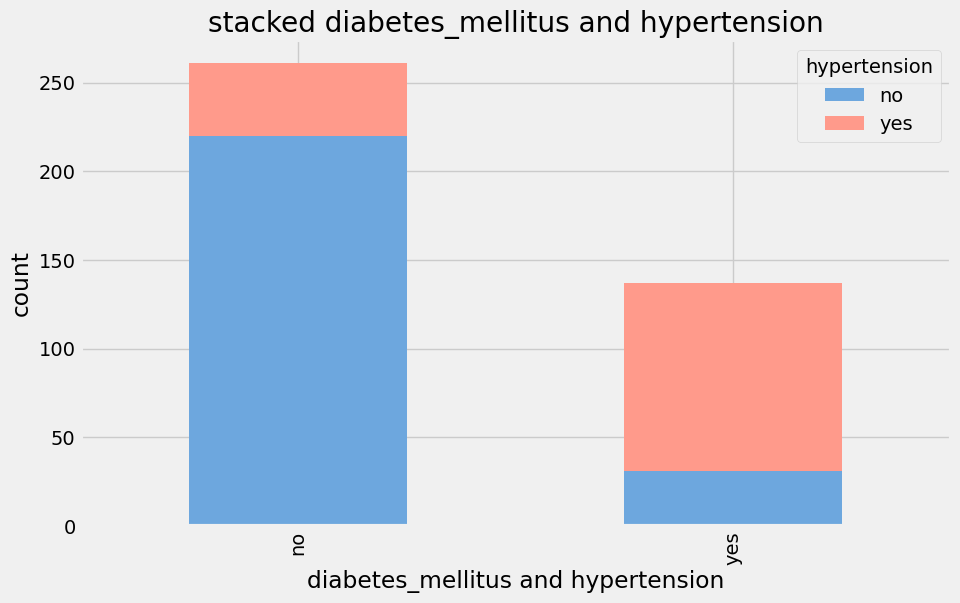

In [85]:
diabetes_hypertension = pd.crosstab(df['diabetes_mellitus'], df['hypertension'])
diabetes_hypertension.plot(kind = 'bar', stacked = True, color = ['#6DA7DE', '#FF9A8B'], figsize = (10, 6))

plt.xlabel("diabetes_mellitus and hypertension")
plt.ylabel("count")
plt.legend(title="hypertension")
plt.title("stacked diabetes_mellitus and hypertension")
plt.show()

In [92]:
def scatter(col1, col2):
    fig = px.scatter(df, x = col1, y=col2, color = "class", template = "plotly_dark")
    return fig.show()
    

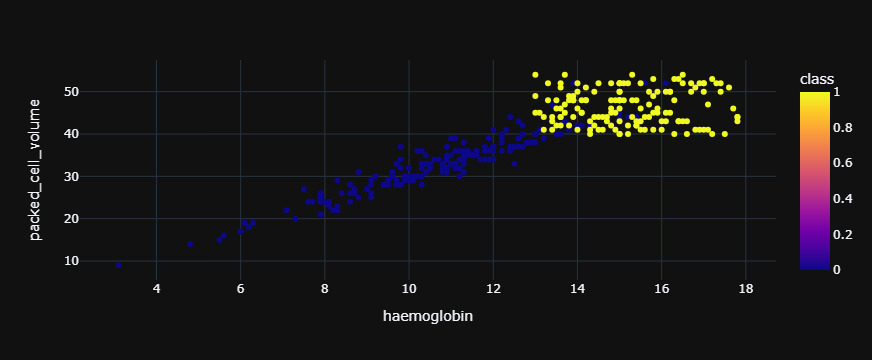

In [93]:
scatter('haemoglobin', 'packed_cell_volume')

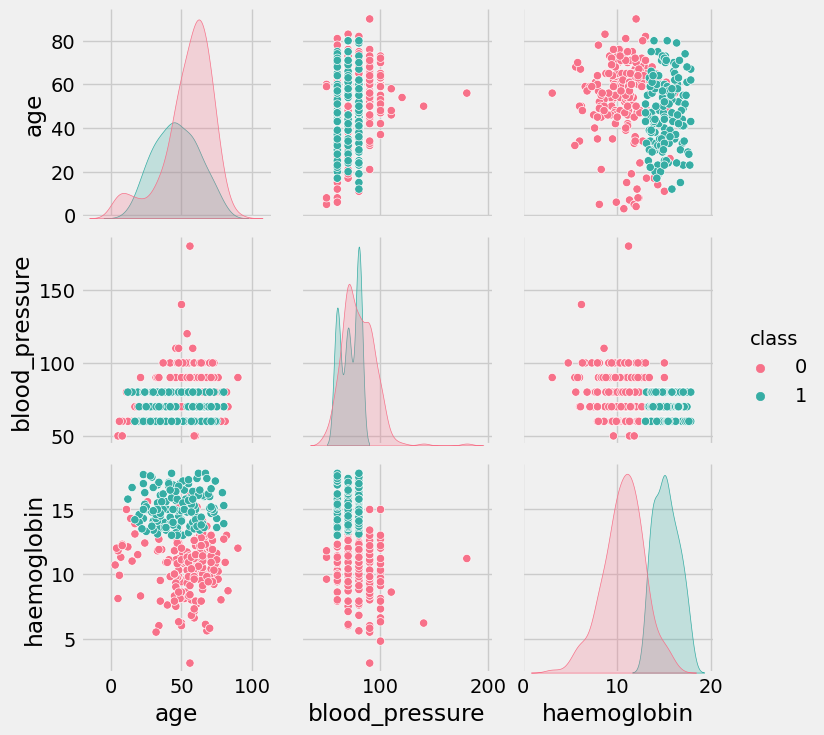

In [94]:
#multivariable analysis

selected_coulmns = ['age', 'blood_pressure', 'haemoglobin', 'class']
sns.pairplot(df[selected_coulmns], hue ='class', palette = 'husl')

<Axes: >

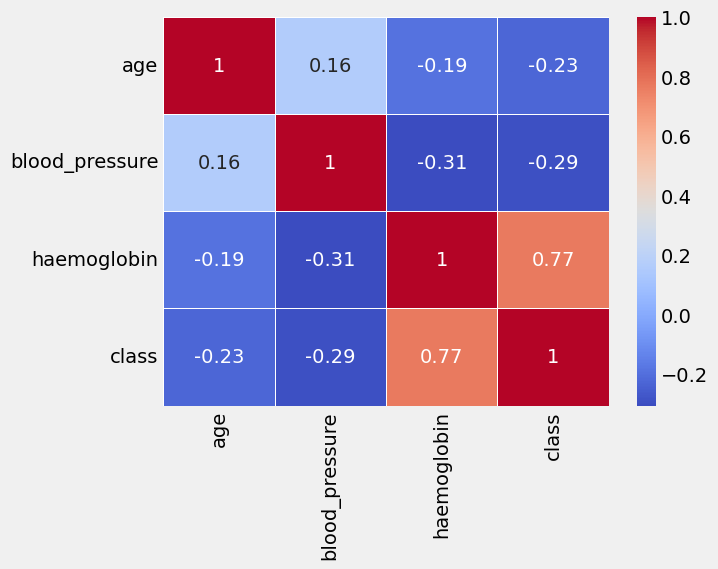

In [95]:
df[selected_coulmns].corr()

sns.heatmap(df[selected_coulmns].corr(), annot = True, cmap = "coolwarm", linewidth = .5)

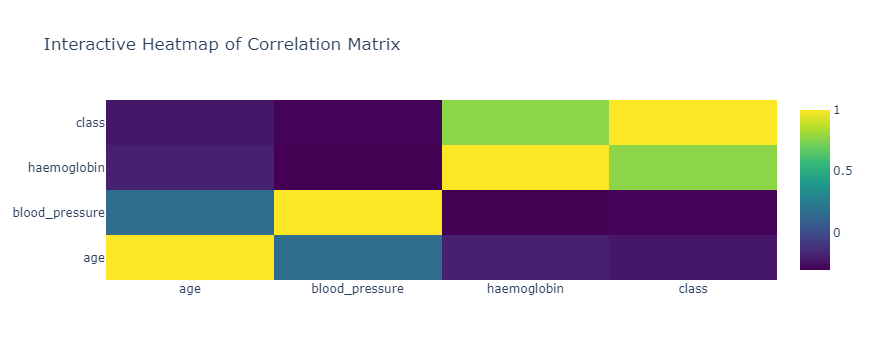

In [96]:
import plotly.graph_objects as go

heatmap_data = df[selected_coulmns].corr()

fig = go.Figure(data=go.Heatmap(z=heatmap_data.values,
                                x=heatmap_data.columns,
                                y=heatmap_data.index,
                                colorscale='Viridis'))

fig.update_layout(title='Interactive Heatmap of Correlation Matrix')
fig.show()

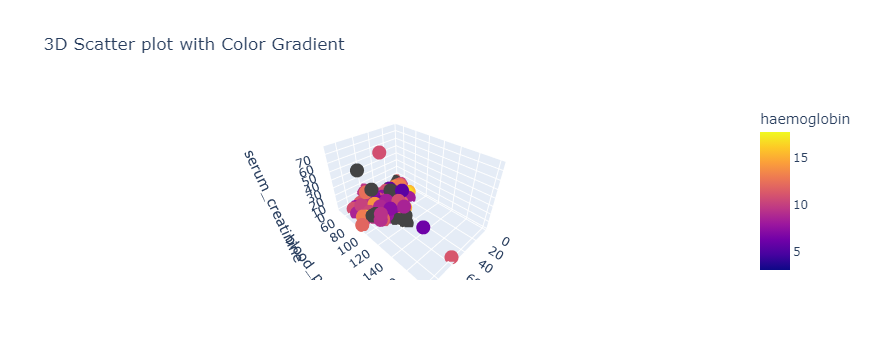

In [97]:
fig = px.scatter_3d(df, x='age', y='blood_pressure', z='serum_creatinine', color='haemoglobin',
                    title='3D Scatter plot with Color Gradient')
fig.show()